In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier  #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
fat_data = pd.read_csv("data/Fat_Supply_Quantity_Data.csv")
fat_data['Number of Deaths'] = (fat_data['Deaths']/100) * fat_data['Population']
fat_data.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),Number of Deaths
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,0.3593,4.5,29.8,0.108128,0.004002,0.088517,0.015608,38928000.0,%,1558.0
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,0.6503,22.3,6.2,0.852925,0.019697,0.426075,0.407153,2838000.0,%,559.0
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,0.5145,26.6,3.9,0.139890,0.004617,0.094770,0.040503,44357000.0,%,2048.0
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,...,0.1231,6.8,25,0.038230,0.000944,0.018138,0.019147,32522000.0,%,307.0
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,...,0.2469,19.1,NaN,0.133673,0.003061,0.124490,0.006122,98000.0,%,3.0


In [3]:
fat_data.describe()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population,Number of Deaths
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,167.000000,162.000000,162.000000,162.000000,160.000000,1.700000e+02,162.000000
mean,0.001035,20.695714,4.138451,0.000450,4.376548,0.953890,0.850437,0.542117,9.494279,0.056589,...,29.304396,18.571657,0.309512,18.707784,0.862003,0.017347,0.543186,0.304243,4.452364e+07,7723.888889
std,0.009569,8.002713,3.287462,0.004039,3.183815,0.643957,0.924103,0.838286,4.666762,0.072633,...,8.002369,6.766615,0.211766,9.633557,1.001920,0.023772,0.708172,0.567079,1.564182e+08,26575.272347
min,0.000000,5.018200,0.026200,0.000000,0.990800,0.058000,0.017400,0.037300,0.906100,0.000000,...,13.098200,4.954900,0.026300,2.100000,0.000331,0.000000,0.000000,0.000000,5.400000e+04,0.000000
25%,0.000000,14.885800,1.674225,0.000000,1.970150,0.411350,0.330975,0.239500,6.263575,0.010125,...,23.133050,13.812825,0.173675,8.500000,0.084302,0.001195,0.049460,0.004398,2.816250e+06,77.500000
50%,0.000000,20.943050,3.312350,0.000000,3.306750,0.898300,0.572700,0.361400,9.259000,0.031650,...,29.060600,18.192550,0.247450,21.200000,0.483424,0.006487,0.234271,0.043118,1.018150e+07,534.000000
75%,0.000000,26.866950,6.227575,0.000000,5.587600,1.276900,1.111625,0.577800,11.750450,0.076325,...,35.117250,23.597300,0.362925,25.700000,1.352780,0.021466,0.788700,0.339165,3.271625e+07,2727.250000
max,0.097600,36.901800,14.937300,0.051100,18.376300,3.275600,8.406800,9.672700,26.429200,0.456100,...,44.981800,36.418600,1.153800,45.600000,4.349014,0.113374,3.348123,3.978142,1.402385e+09,237570.000000


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


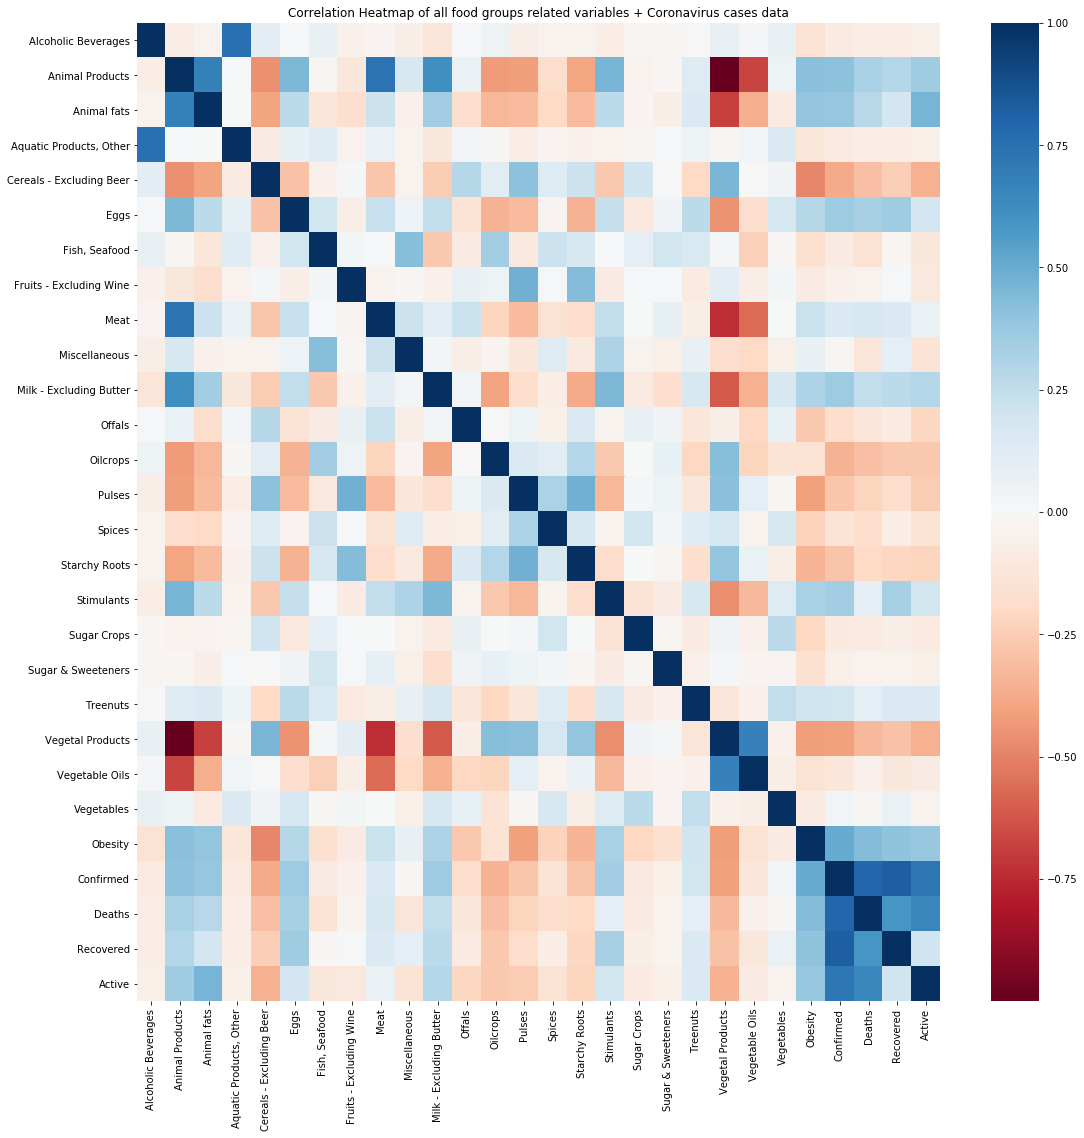

In [4]:
corr = fat_data.loc[:, "Alcoholic Beverages":"Active"].drop("Undernourished", axis=1).corr()
plt.figure(figsize=(18,18))
ax = sb.heatmap(corr, cmap="RdBu")
ax.set_title("Correlation Heatmap of all food groups related variables + Coronavirus cases data")
ax.figure.show()

In [5]:
fat_data['Undernourished'] = fat_data['Undernourished'].fillna("0")
fat_data = fat_data.fillna(0)

def data_preprocess(x):
    if (x[0] == "<"):
        return float(x[1:])
    else:
        return float(x)

fat_data['Undernourished'] = fat_data['Undernourished'].apply(data_preprocess)
X = fat_data.drop(columns = ['Country', 'Deaths', 'Unit (all except Population)'])
y = np.asarray(fat_data['Deaths'], dtype="|S6")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

clf = MLPClassifier(hidden_layer_sizes=(10), solver='lbfgs', activation = "logistic", random_state=42)                                                             
clf.fit(X_train,y_train)

print('Accuracy on training---')
y_pred_train=clf.predict(X_train)
print(accuracy_score(y_train,y_pred_train))
print('Accuracy on testing---')
y_pred_test=clf.predict(X_test)
print(accuracy_score(y_test,y_pred_test))

Accuracy on training---
0.09734513274336283
Accuracy on testing---
0.12280701754385964


In [6]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100,100), solver='adam', activation = "logistic", random_state=42)                                                             
clf.fit(X_train,y_train)

print('Accuracy on training---')
y_pred_train=clf.predict(X_train)
print(accuracy_score(y_train,y_pred_train))
print('Accuracy on testing---')
y_pred_test=clf.predict(X_test)
print(accuracy_score(y_test,y_pred_test))

Accuracy on training---
0.09734513274336283
Accuracy on testing---
0.12280701754385964


In [7]:
X_train

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Recovered,Active,Population,Number of Deaths
27,0.0,18.5453,2.8767,0.0,2.7645,0.1122,0.5509,0.4998,12.9144,0.0102,...,31.4598,19.4838,0.0918,6.3,59.6,0.101014,0.039834,0.059896,4830000.0,62.0
78,0.0,23.4158,3.0343,0.0,1.7405,0.8975,0.1321,0.1787,9.6740,0.0389,...,26.5822,21.7258,0.3497,21.3,2.5,0.623382,0.575715,0.037754,18732000.0,1857.0
147,0.0,19.3217,2.6952,0.0,1.1629,1.4818,0.4667,0.2956,13.2817,0.0194,...,30.6783,24.8016,0.3111,0.0,3.5,0.002444,0.002219,0.000195,23610000.0,7.0
38,0.0,25.1685,9.7011,0.0,1.1998,0.8222,0.3000,0.1870,8.6212,0.0212,...,24.8333,21.2267,0.1729,28.5,2.5,3.871109,2.268841,1.556934,10716000.0,4858.0
41,0.0,26.9250,3.8063,0.0,1.4913,0.3619,1.6536,1.1856,13.7339,0.1123,...,23.0812,12.3237,0.2309,28.2,6.2,0.087500,0.048611,0.038889,72000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,11.1327,3.8118,0.0,6.2761,1.9023,0.1441,0.2306,3.5164,0.0432,...,38.8673,29.6152,0.1513,27.4,29.0,1.255001,1.079743,0.146744,39725000.0,11327.0
106,0.0,16.7373,3.3171,0.0,6.8020,0.2718,0.6075,0.2798,7.7772,0.0959,...,33.2667,22.9078,0.1359,15.0,27.3,0.519913,0.456710,0.057930,2541000.0,134.0
14,0.0,26.7378,12.6234,0.0,1.3531,1.1703,0.6188,0.2373,5.6817,0.0000,...,23.2622,19.3504,0.2982,24.5,2.5,4.349014,0.257499,3.978142,11515000.0,13055.0
92,0.0,19.0932,1.7454,0.0,10.0681,0.3406,0.7450,1.2984,11.5581,0.0213,...,30.9068,15.8791,0.1916,4.5,44.4,0.062197,0.059644,0.001654,27691000.0,249.0


In [8]:
y_train

array([b'0.0012', b'0.0099', b'2.9648', b'0.0453', b'0.0', b'0.0030',
       b'0.0025', b'0.0073', b'0.0249', b'0.0002', b'0.0072', b'0.0386',
       b'0.0743', b'0.0052', b'0.0040', b'0.0409', b'0.0031', b'0.0020',
       b'0.0063', b'0.1060', b'0.0005', b'0.0061', b'0.0653', b'0.0016',
       b'0.0179', b'0.0282', b'0.0', b'0.0020', b'0.0178', b'0.0127',
       b'0.0008', b'0.0052', b'0.0002', b'0.0028', b'0.0001', b'0.0105',
       b'0.0', b'0.0005', b'0.0290', b'0.0286', b'0.0731', b'0.0535',
       b'0.0076', b'0.0021', b'0.0018', b'0.0003', b'0.0332', b'0.0024',
       b'0.0739', b'0.0205', b'0.0009', b'0.0208', b'0.0002', b'0.0197',
       b'0.0', b'0.0115', b'0.0004', b'0.0056', b'0.0035', b'0.0732',
       b'0.0455', b'0.0130', b'0.0005', b'0.0284', b'0.0172', b'0.0081',
       b'0.0157', b'0.0016', b'0.0158', b'0.0017', b'0.0005', b'0.0107',
       b'0.0', b'0.0580', b'0.0', b'0.0756', b'0.0389', b'0.0008',
       b'0.0019', b'0.0815', b'0.0', b'0.0170', b'0.0050', b'0.0036',

In [9]:
1/(2/(3/4))

0.375

In [10]:
(1+3+5+5+7)/5

4.2